In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, wilcoxon
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read data

In [2]:
data = pd.read_csv('reaction_times.csv')

# Find accuracy and mean per congruent and incongruent

In [3]:
avg_incongruent = []
avg_congruent = []
accuracy_incongruent = []
accuracy_congruent = []

for row in data.iterrows():
    acc_incongruent = []
    acc_congruent = []

    mean_incongruent = []
    mean_congruent = []

    for i in range(1, 21):
        if row[1][i] == False and row[1][i + 40] == "Correct":
            mean_incongruent.append(row[1][i + 20])
            acc_incongruent.append(1)
        elif row[1][i] == False and row[1][i + 40] == "Incorrect":
            acc_incongruent.append(0)
        elif row[1][i] == True and row[1][i + 40] == "Correct":
            mean_congruent.append(row[1][i + 20])
            acc_congruent.append(1)
        elif row[1][i] == True and row[1][i + 40] == "Incorrect":
            acc_congruent.append(0)

    avg_incongruent.append(np.mean(mean_incongruent))
    avg_congruent.append(np.mean(mean_congruent))
    accuracy_incongruent.append(np.sum(acc_incongruent)/len(acc_incongruent))
    accuracy_congruent.append(np.sum(acc_congruent)/len(acc_congruent))

/var/folders/c6/k78nzngn7nbdd0786bxl3s0c0000gn/T/ipykernel_60519/1776076382.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[1][i] == False and row[1][i + 40] == "Correct":
/var/folders/c6/k78nzngn7nbdd0786bxl3s0c0000gn/T/ipykernel_60519/1776076382.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif row[1][i] == False and row[1][i + 40] == "Incorrect":
/var/folders/c6/k78nzngn7nbdd0786bxl3s0c0000gn/T/ipykernel_60519/1776076382.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame

# Add columns to df

In [4]:
data["avg_incongruent"] = avg_incongruent
data["avg_congruent"] = avg_congruent
data["acc_incongruent"] = accuracy_incongruent
data["acc_congruent"] = accuracy_congruent

# Split into control and exercise group

In [5]:
execise = data[data["group"] == "exercise"]
control = data[data["group"] == "control"]

In [6]:
exercise_1 = execise[execise["trial"] == 1]
control_1 = control[control["trial"] == 1]
exercise_2 = execise[execise["trial"] == 2]
control_2 = control[control["trial"] == 2]

# get mean rt and acc for whole group

In [7]:
rt_exercise_1 = np.mean(exercise_1["avg_incongruent"])
rt_exercise_2 = np.mean(exercise_2["avg_incongruent"])
rt_control_1 = np.mean(control_1["avg_incongruent"])
rt_control_2 = np.mean(control_2["avg_incongruent"])

In [8]:
exerc = [rt_exercise_1, rt_exercise_2]
contr = [rt_control_1, rt_control_2]

Text(0.5, 1.0, 'Reaction time Incongruent by group and trial')

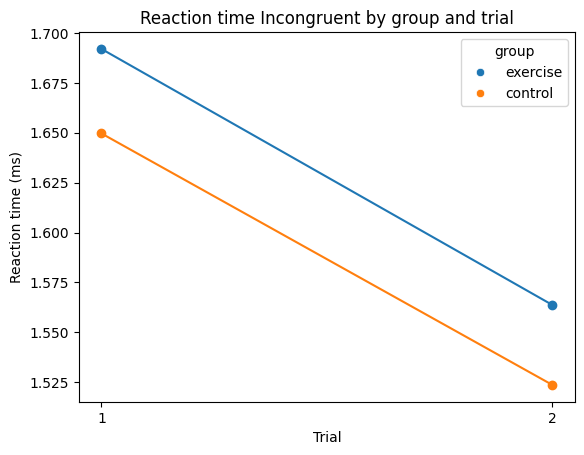

In [9]:
#connect the lines
plt.plot([1, 2], exerc, marker='o')
plt.plot([1, 2], contr, marker='o')
plot_data = pd.DataFrame({
    'trial': [1, 2, 1, 2],
    'reaction_time': exerc + contr,
    'group': ['exercise', 'exercise', 'control', 'control']
})
#add labels 
sns.scatterplot(data=plot_data, x='trial', y='reaction_time', hue='group')
plt.xlabel('Trial')
plt.xticks([1, 2])
plt.ylabel('Reaction time (ms)')
plt.title('Reaction time Incongruent by group and trial')


# box plot

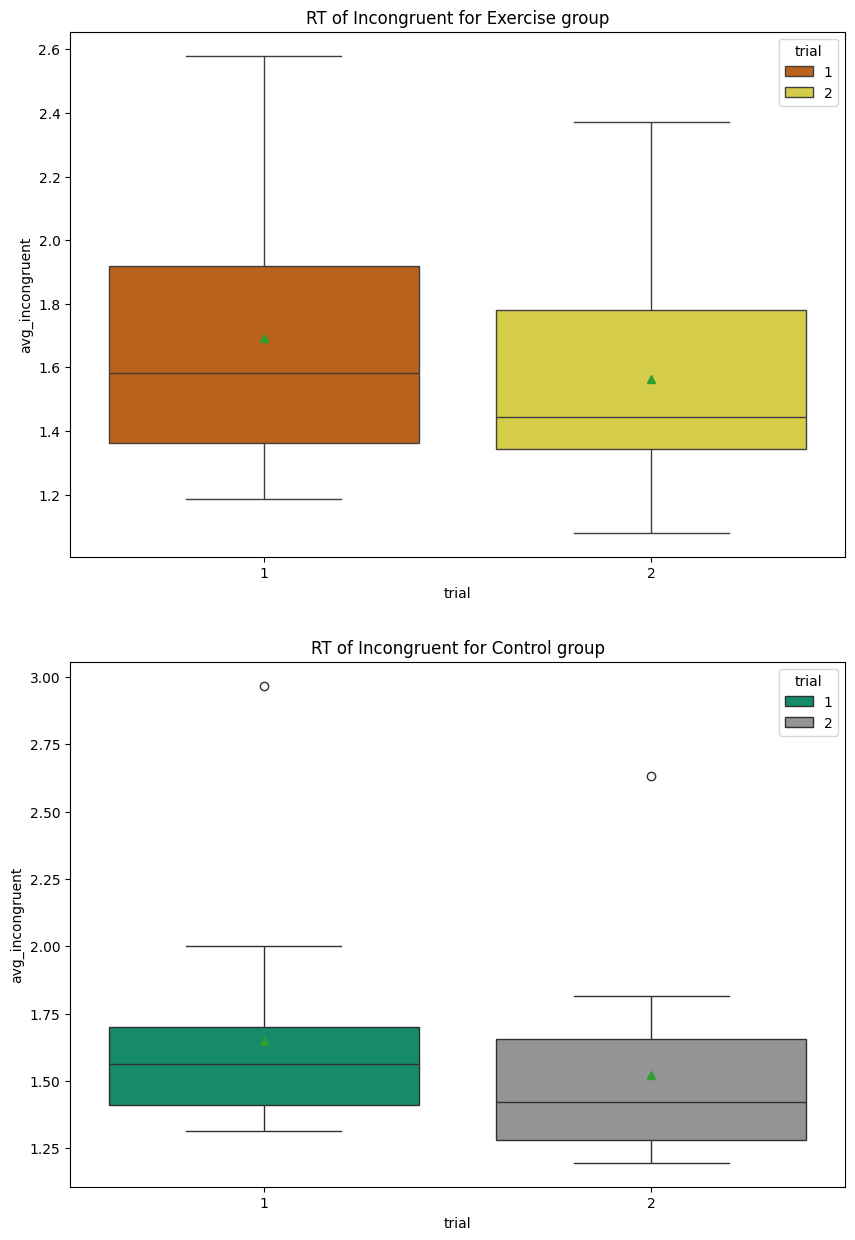

In [10]:
colorblind_palette = sns.color_palette("colorblind")
fig, ax = plt.subplots(2, 1, figsize=(10, 15))
sns.boxplot(x="trial", y="avg_incongruent", data=execise, ax=ax[0], hue='trial', palette=[colorblind_palette[3], colorblind_palette[8]], legend=True, showmeans=True)
ax[0].set_title("RT of Incongruent for Exercise group")
# sns.boxplot(x="trial", y="avg_congruent", data=execise, ax=ax[0, 1],hue='trial',palette=[colorblind_palette[3], colorblind_palette[8]], legend=False)
# ax[0, 1].set_title("RT of Congruent for Exercise group")

sns.boxplot(x="trial", y="avg_incongruent", data=control, ax=ax[1], hue='trial', palette=[colorblind_palette[2], colorblind_palette[7]], legend=True, showmeans=True)
ax[1].set_title("RT of Incongruent for Control group")
# sns.boxplot(x="trial", y="avg_congruent", data=control, ax=ax[1, 1],hue='trial',palette=[colorblind_palette[2], colorblind_palette[7]], legend=False)
# ax[1, 1].set_title("RT of Congruent for Control group")

plt.show()

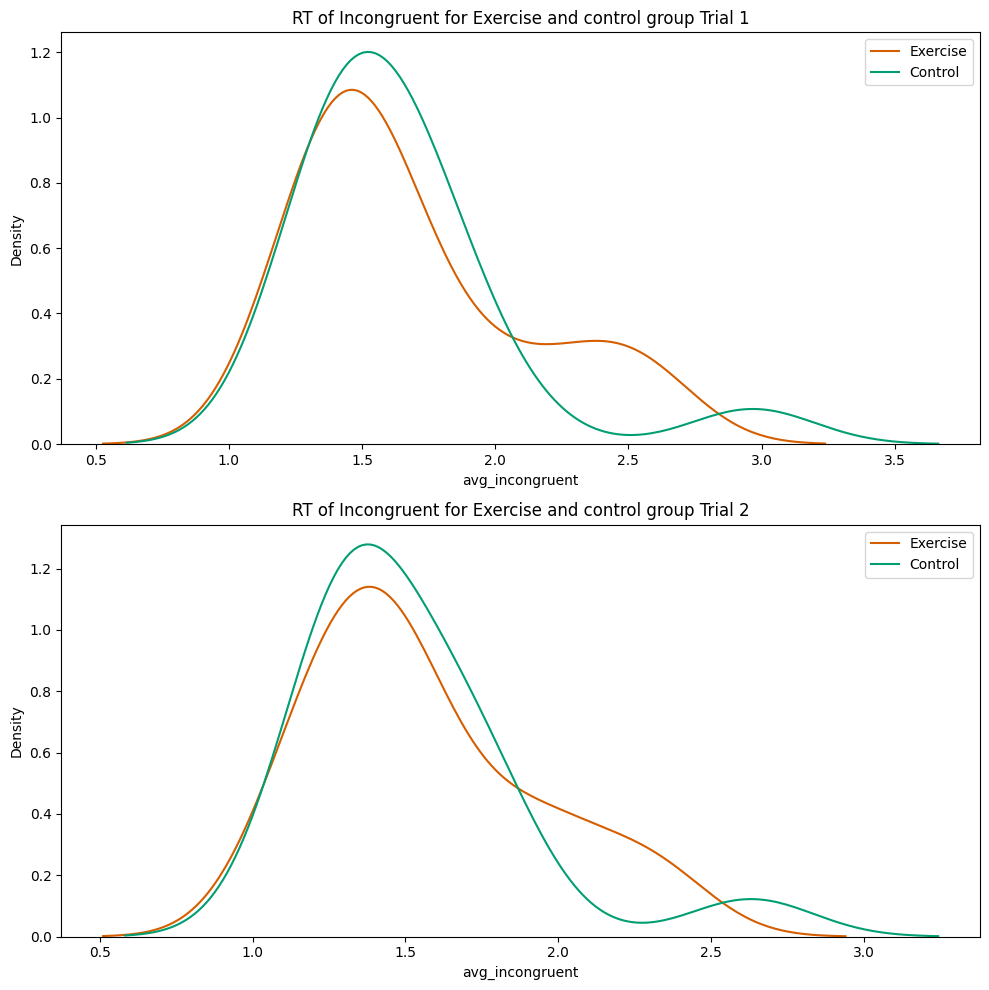

In [11]:
# Assuming execise is your DataFrame and colorblind_palette is defined
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_1["avg_incongruent"], ax=ax[0], color=colorblind_palette[3])
sns.kdeplot(control_1["avg_incongruent"], ax=ax[0], color=colorblind_palette[2])
ax[0].set_title("RT of Incongruent for Exercise and control group Trial 1")
ax[0].legend(["Exercise", "Control"])
# KDE plot for the 'avg_congruent' column
# sns.kdeplot(exercise_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[8])
# sns.kdeplot(control_1["avg_congruent"], ax=ax[0,1], color=colorblind_palette[7])
# ax[0,1].set_title("RT of Congruent for Exercise and control group Trial 1")
# ax[0,1].legend(["Exercise", "Control"])

# KDE plot for the 'avg_incongruent' column
sns.kdeplot(exercise_2["avg_incongruent"], ax=ax[1], color=colorblind_palette[3])
sns.kdeplot(control_2["avg_incongruent"], ax=ax[1], color=colorblind_palette[2])
ax[1].set_title("RT of Incongruent for Exercise and control group Trial 2")
ax[1].legend(["Exercise", "Control"])

# # KDE plot for the 'avg_congruent' column
# sns.kdeplot(exercise_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[8])
# sns.kdeplot(control_2["avg_congruent"], ax=ax[1,1], color=colorblind_palette[7])
# ax[1,1].set_title("RT of Congruent for Exercise and control group Trial 2")
# ax[1,1].legend(["Exercise", "Control"]) 


plt.tight_layout()
plt.show()

In [12]:
print(f"error rate for exercise 1 is  {1- exercise_1.acc_incongruent.mean()}")
print(f"error rate for control 1 is  {1- control_1.acc_incongruent.mean()}")
print(f"error rate for exercise 1 is  {1- exercise_2.acc_incongruent.mean()}")
print(f"error rate for control  1 is  {1- control_2.acc_incongruent.mean()}")

error rate for exercise 1 is  0.013417652306541239
error rate for control 1 is  0.009375000000000022
error rate for exercise 1 is  0.0
error rate for control  1 is  0.027191558441558406


In [13]:
print(f"avg rt for incongruent exercise 1 is {exercise_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 1 is {control_1.avg_incongruent.mean()}")
print(f"avg rt for incongruent exercise 2 is {exercise_2.avg_incongruent.mean()}")
print(f"avg rt for incongruent control 2 is {control_2.avg_incongruent.mean()}")

avg rt for incongruent exercise 1 is 1.6920447985891802
avg rt for incongruent control 1 is 1.6496702075984082
avg rt for incongruent exercise 2 is 1.5636713987163615
avg rt for incongruent control 2 is 1.523579689863226


# Testing normality of data

In [14]:
from scipy.stats import shapiro
print(shapiro(exercise_1.avg_incongruent))
print(shapiro(control_1.avg_incongruent))
print(shapiro(exercise_2.avg_incongruent)) # the only one that is normally distributed
print(shapiro(control_2.avg_incongruent))

ShapiroResult(statistic=np.float64(0.848123400431472), pvalue=np.float64(0.0010576192774873967))
ShapiroResult(statistic=np.float64(0.7177291557497362), pvalue=np.float64(0.00026641138321182234))
ShapiroResult(statistic=np.float64(0.9076738329269616), pvalue=np.float64(0.020127970230389144))
ShapiroResult(statistic=np.float64(0.7699374951271194), pvalue=np.float64(0.0011160507073256338))


In [15]:
control_total = control_1.shape[0]

exercise_1 = exercise_1.iloc[:control_total]
exercise_2 = exercise_2.iloc[:control_total]
#merge the data
data_balanced = pd.concat([exercise_1, control_1, exercise_2, control_2])


In [16]:
df = data_balanced[["id", "group", "trial", "avg_incongruent"]]

model = smf.mixedlm("avg_incongruent ~ trial * group", df, groups=df["id"]).fit()

print(model.summary())

              Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  avg_incongruent
No. Observations:    64       Method:              REML           
No. Groups:          32       Scale:               0.0178         
Min. group size:     2        Log-Likelihood:      -11.4298       
Max. group size:     2        Converged:           Yes            
Mean group size:     2.0                                          
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                1.776    0.118 15.048 0.000  1.544  2.007
group[T.exercise]        0.017    0.167  0.100 0.920 -0.310  0.344
trial                   -0.126    0.047 -2.677 0.007 -0.218 -0.034
trial:group[T.exercise] -0.018    0.067 -0.276 0.783 -0.149  0.112
Group Var                0.134    0.392                           



In [17]:
# Separate data by group
exercise_group = data[data['group'] == 'exercise']
control_group = data[data['group'] == 'control']

# Separate data by trial within each group
exercise_1 = exercise_group[exercise_group['trial'] == 1]  # trial 1 for exercise group
exercise_2 = exercise_group[exercise_group['trial'] == 2]  # trial 2 for exercise group
control_1 = control_group[control_group['trial'] == 1]  # trial 1 for control group
control_2 = control_group[control_group['trial'] == 2]  # trial 2 for control group

# --- 1. Mann-Whitney U Test (between-group comparisons) ---
# Compare the 'avg_incongruent' between exercise and control groups for trial 1 (pre-exercise)
stat, p_value = mannwhitneyu(exercise_1['avg_incongruent'], control_1['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 1):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare the 'avg_incongruent' between exercise and control groups for trial 2 (post-exercise)
stat, p_value = mannwhitneyu(exercise_2['avg_incongruent'], control_2['avg_incongruent'])
print(f"Mann-Whitney U Test (Exercise vs Control - Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# --- 2. Wilcoxon Signed-Rank Test (within-subject comparisons) ---
# Compare within the exercise group (trial 1 vs trial 2)
stat, p_value = wilcoxon(exercise_1['avg_incongruent'], exercise_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")

# Compare within the control group (trial 1 vs trial 2)
stat, p_value = wilcoxon(control_1['avg_incongruent'], control_2['avg_incongruent'])
print(f"Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):")
print(f"Statistic: {stat}, p-value: {p_value}\n")


Mann-Whitney U Test (Exercise vs Control - Trial 1):
Statistic: 212.0, p-value: 0.9299237214704998

Mann-Whitney U Test (Exercise vs Control - Trial 2):
Statistic: 229.0, p-value: 0.753464595142203

Wilcoxon Signed-Rank Test (Exercise - Trial 1 vs Trial 2):
Statistic: 76.0, p-value: 0.0054652392864227295

Wilcoxon Signed-Rank Test (Control - Trial 1 vs Trial 2):
Statistic: 15.0, p-value: 0.004180908203125

